## Modelo de regresion lineal simple con Multiples Variables

In [1]:
# Librerias

import pandas as pd
import seaborn as sb
from sklearn.linear_model import LinearRegression




In [2]:
# Leer dataset

datos = pd.read_csv("housing.csv")

In [3]:
datos.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
datos["ocean_proximity"]

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20640, dtype: object

In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Problemas

- ocean_proximity: datos en palabras
- total_bedrooms: 200 datos vacios


In [6]:
datos.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

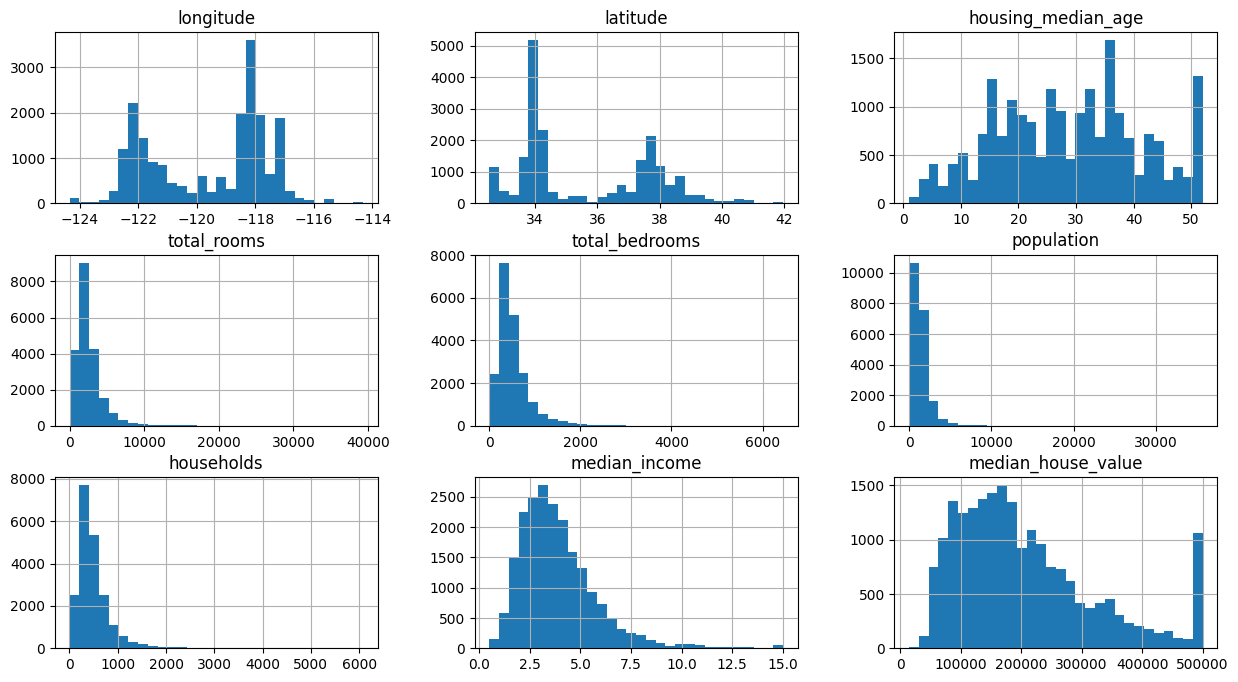

In [7]:
datos.hist(figsize=(15,8), bins=30,)

<Axes: xlabel='latitude', ylabel='longitude'>

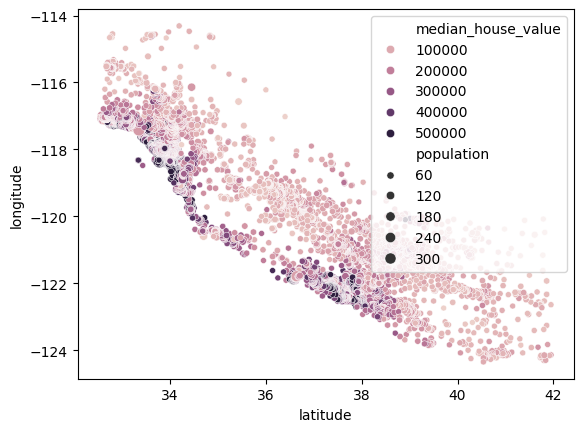

In [8]:
import seaborn as sb

sb.scatterplot(
    x="latitude",
    y="longitude",
    data=datos,
    hue="median_house_value",
    size=datos["population"]/100
)

<Axes: xlabel='latitude', ylabel='longitude'>

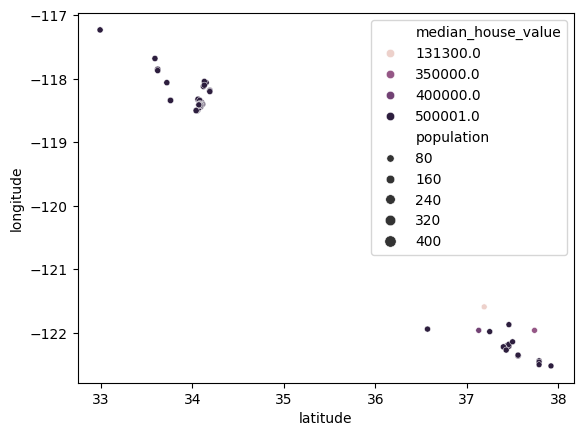

In [9]:

sb.scatterplot(
    x="latitude",
    y="longitude",
    data=datos[(datos.median_income > 14 )],
    hue="median_house_value",
    size=datos["population"]/80
)

In [10]:
datos.dropna()
# Elimnar el vector completo de los datos faltantes

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [11]:
finalDataFrame = datos.dropna()

In [12]:
finalDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [13]:
# Convertir el datos en str a numeros
finalDataFrame["ocean_proximity"]

0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20433, dtype: object

In [14]:
finalDataFrame["ocean_proximity"].value_counts

<bound method IndexOpsMixin.value_counts of 0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20433, dtype: object>

In [15]:
# funcion de pandas Dummies / One-Hot Encondig


dummies = pd.get_dummies(finalDataFrame["ocean_proximity"], dtype=int)

In [16]:
finalDataFrame.join(dummies)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,0,1,0,0,0


In [17]:
finalDataFrame = finalDataFrame.join(dummies)

In [18]:
finalDataFrame.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0,0,0,1,0


In [19]:
# finalDataFrame.drop(["ocean_proximity"]) asi falla es necesario poner axis= 1 para refererse que una comuna(vector )
finalDataFrame = finalDataFrame.drop(["ocean_proximity"], axis=1)

In [20]:
finalDataFrame.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


In [21]:
finalDataFrame.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398,0.320831,-0.055337,0.009501,-0.474714,0.046185
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638,-0.446928,0.351084,-0.016662,0.358785,-0.161342
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432,0.045553,-0.236968,0.017105,0.256149,0.020797
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294,-0.003777,0.026477,-0.007603,-0.023647,-0.008674
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686,0.018314,-0.006463,-0.004361,-0.019873,0.000679
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300,0.073450,-0.019602,-0.010451,-0.061480,-0.023498
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894,0.041883,-0.038265,-0.009119,-0.011280,0.002106
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355,0.168715,-0.237536,-0.009281,0.056677,0.027351
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000,0.257614,-0.484787,0.023525,0.160526,0.140378
<1H OCEAN,0.320831,-0.446928,0.045553,-0.003777,0.018314,0.073450,0.041883,0.168715,0.257614,1.000000,-0.607778,-0.013928,-0.314721,-0.342018


<Axes: >

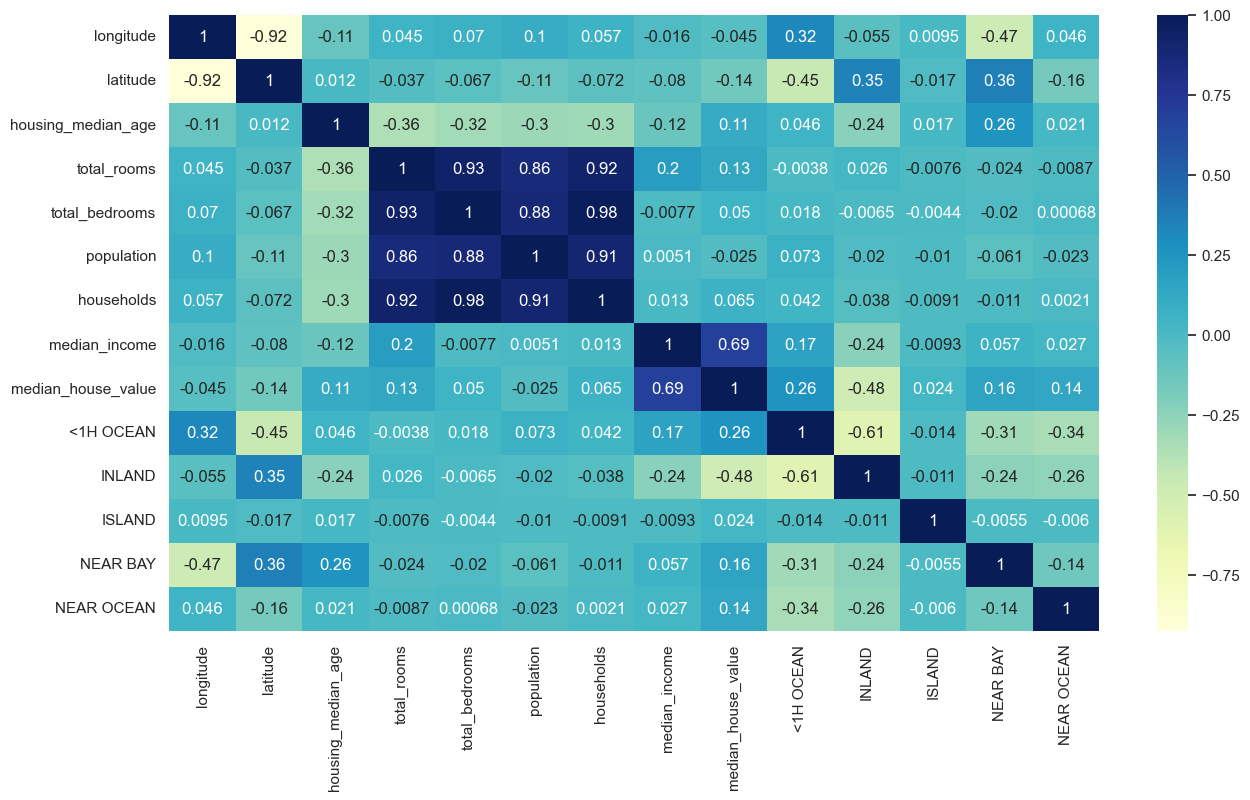

In [22]:
sb.set(rc={'figure.figsize': (15,8)})

sb.heatmap(
    finalDataFrame.corr(),
    annot=True,
    cmap="YlGnBu"
    )

In [23]:
# Buscando los que tiene mayor relacion con nuestra variable objetivo (el tarjet)

finalDataFrame.corr()["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688355
<1H OCEAN             0.257614
NEAR BAY              0.160526
NEAR OCEAN            0.140378
total_rooms           0.133294
housing_median_age    0.106432
households            0.064894
total_bedrooms        0.049686
ISLAND                0.023525
population           -0.025300
longitude            -0.045398
latitude             -0.144638
INLAND               -0.484787
Name: median_house_value, dtype: float64

<Axes: xlabel='median_house_value', ylabel='median_income'>

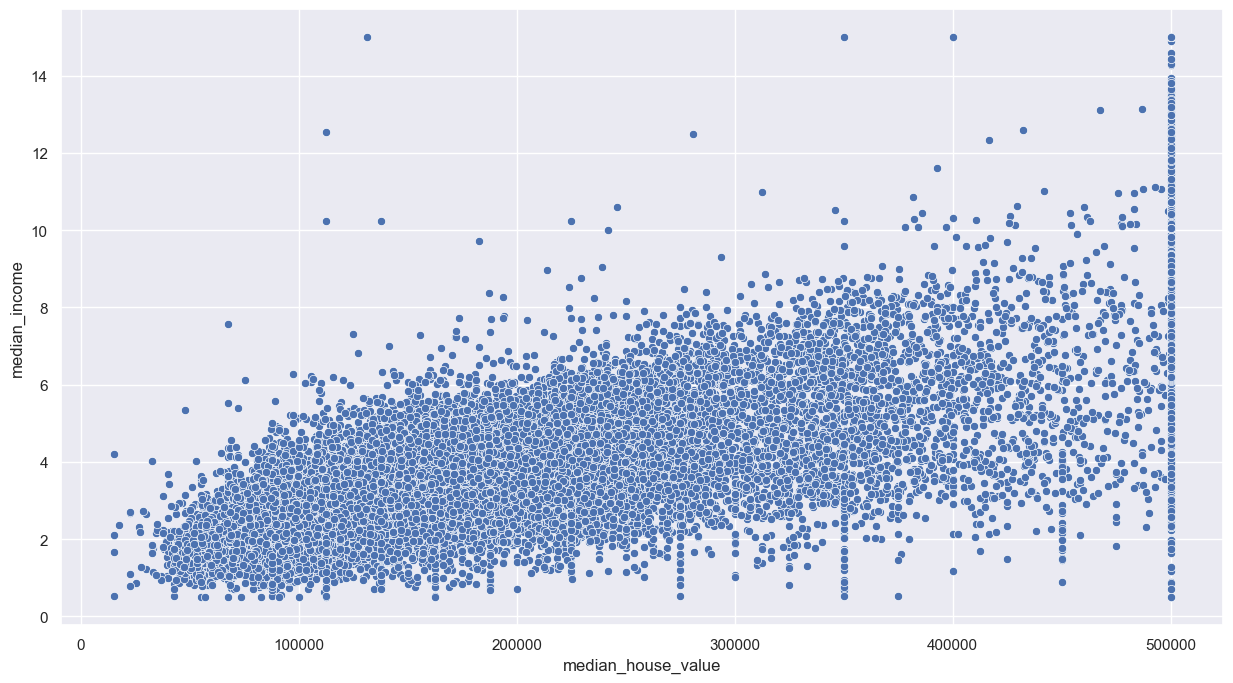

In [24]:
sb.scatterplot(
    x = finalDataFrame["median_house_value"],
    y = finalDataFrame["median_income"]
)

In [26]:
finalDataFrame["bedroom_ratio"] = finalDataFrame["total_bedrooms"] / finalDataFrame["total_rooms"]

<Axes: >

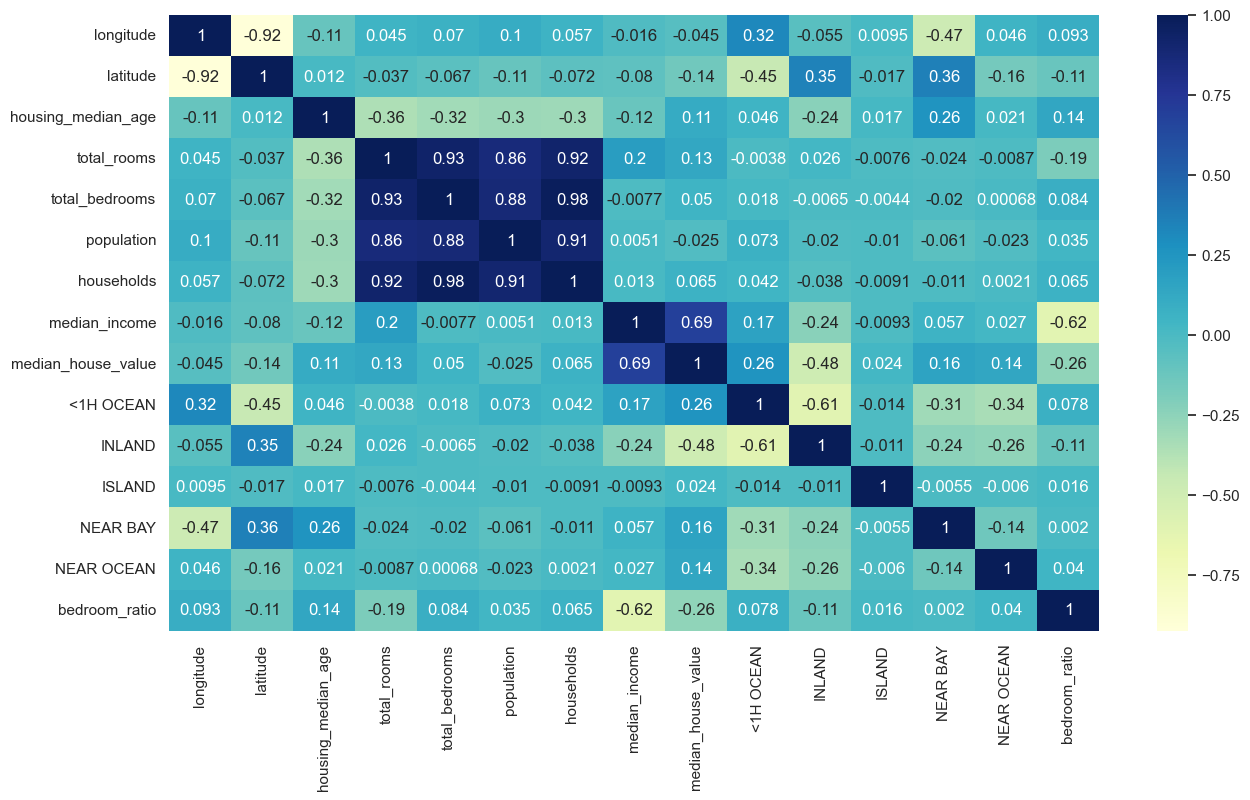

In [27]:
sb.set(rc={'figure.figsize': (15,8)})

sb.heatmap(
    finalDataFrame.corr(),
    annot=True,
    cmap="YlGnBu"
    )

In [28]:
# Separar datos en feactures y targets

feactures = finalDataFrame.drop(["median_house_value"], axis=1)
target = finalDataFrame["median_house_value"]

In [29]:
# separa los datos en 2 partes: Conjunto de entrenamiento y uno de pruebas

from sklearn.model_selection import train_test_split

x_entrenamieto, x_pruebas, y_entrenaminto, y_pruebas = train_test_split(
    feactures,
    target,
    test_size=.2
)

In [31]:
x_entrenamieto.shape

(16346, 14)

In [32]:
y_entrenaminto

971      332400.0
7082     174800.0
2225     188300.0
284      157300.0
11379    265000.0
           ...   
2681      69400.0
1390     225400.0
12760    160900.0
15779    350000.0
14158    155400.0
Name: median_house_value, Length: 16346, dtype: float64

In [33]:
modelo = LinearRegression()

In [34]:
modelo.fit(x_entrenamieto, y_entrenaminto)

LinearRegression()

TypeError: RegressorMixin.score() missing 1 required positional argument: 'y'

In [38]:
prediciones = modelo.predict(x_pruebas)

In [40]:
pd.DataFrame(prediciones) # Se guardan nuestra predicciones
comprative = {"Prediccion":prediciones, "Valor Real": y_pruebas}

In [42]:
pd.DataFrame(comprative)

,Prediccion,Valor Real
16953,349754.167781,480800.0
17468,341397.610510,331200.0
13839,45889.956184,56500.0
15789,222925.614076,112500.0
5130,135066.448340,97000.0
...,...,...
8294,302663.215991,439300.0
8743,269627.739802,346200.0
10708,187464.470937,72300.0
17016,264096.458373,435200.0


In [44]:
print(modelo.score(x_entrenamieto, y_entrenaminto))

0.6505639328167532


In [45]:
print(modelo.score(x_pruebas, y_pruebas))

0.6578125294826134


In [46]:
# Error

from sklearn.metrics import mean_absolute_error
import numpy as np

In [47]:
mse = mean_absolute_error(y_pruebas,prediciones)

In [49]:
mse

48512.587836121136

In [50]:
rmse = np.sqrt(mse)

In [51]:
rmse

np.float64(220.25573281102388)

In [52]:
finalDataFrame.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155,0.442128,0.317917,0.000245,0.111095,0.128615,0.213039
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099,0.496652,0.465678,0.015641,0.314257,0.334782,0.057983
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.175427
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.203162
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.239821
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [55]:
x_escalado = scaler.fit_transform(x_entrenamieto)
x_escaladoPr = scaler.fit_transform(x_pruebas)

In [58]:
pd.DataFrame(x_escalado)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-1.158329,0.945232,-1.081172,-0.231173,-0.628178,-0.480467,-0.559926,1.768708,1.127486,-0.685443,-0.017492,-0.355169,-0.382680,-1.460938
1,0.782379,-0.794813,0.511514,-0.602139,-0.718640,-0.540892,-0.659543,0.205390,1.127486,-0.685443,-0.017492,-0.355169,-0.382680,-0.607935
2,-0.130602,0.544042,-0.842269,0.071759,-0.378217,-0.427048,-0.352826,1.999725,-0.886929,1.458911,-0.017492,-0.355169,-0.382680,-1.333940
3,-1.293031,0.996547,1.068954,-0.509742,-0.659126,-0.677504,-0.607113,-0.099271,-0.886929,-0.685443,-0.017492,2.815557,-0.382680,-0.729061
4,0.812313,-0.916103,-0.205195,-0.176471,-0.459157,-0.099528,-0.329233,0.601247,1.127486,-0.685443,-0.017492,-0.355169,-0.382680,-1.033418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16341,2.014654,-1.237988,-0.444098,-0.539622,-0.390120,-0.242270,-0.289910,-1.222389,-0.886929,1.458911,-0.017492,-0.355169,-0.382680,0.737825
16342,-1.268087,1.094512,0.352245,-0.447225,-0.618656,-0.598689,-0.622842,0.416507,-0.886929,-0.685443,-0.017492,2.815557,-0.382680,-0.793500
16343,-0.903892,1.388407,1.307857,0.029008,0.207406,-0.320210,0.218664,-1.075934,-0.886929,1.458911,-0.017492,-0.355169,-0.382680,0.320435
16344,-1.412767,0.996547,1.865297,-1.093542,-1.106675,-1.113614,-1.231033,-0.007868,-0.886929,-0.685443,-0.017492,2.815557,-0.382680,1.217469
